In [9]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
#gamma = ratio of specific heat
UL = float(input('please insert the left value of U:'))
UR = float(input('please insert the right value of U:'))
rho_L = float(input('please insert the left value of density:'))
rho_R = float(input('please insert the right value of density:'))
PL = float(input('please insert the left value of pressure:'))
PR = float(input('please insert the right value of pressure:'))
yL= float(input('please insert the left value of gas mass concentration:'))
yR= float(input('please insert the right value of gas mass concentration:'))
a = float(input('please insert the sound velocity in gas:'))
rhol= float(input('please insert the incompressible liquid density:'))
Time  = float(input('please insert the time  between zero and infinity(for example 10):'))
Delta_T = float(input('please insert the time interval between each computing point:'))
X_interval = float(input('please insert the lenght interval.(for example if you put 8 , it will consider +8 to -8:'))
Delta_X = float(input('please insert the x interval between each computing point:'))

please insert the left value of U:-1
please insert the right value of U:1
please insert the left value of density:900
please insert the right value of density:800
please insert the left value of pressure:170000
please insert the right value of pressure:160000
please insert the left value of gas mass concentration:0
please insert the right value of gas mass concentration:0
please insert the sound velocity in gas:340
please insert the incompressible liquid density:1000
please insert the time  between zero and infinity(for example 10):2
please insert the time interval between each computing point:0.01
please insert the lenght interval.(for example if you put 8 , it will consider +8 to -8:10
please insert the x interval between each computing point:0.01


In [31]:
yL = ((PL*rhol)-(PL*rho_L))/((rho_L*rhol*(a**2))-(PL*rho_L))
yR = ((PR*rhol)-(PR*rho_R))/((rho_R*rhol*(a**2))-(PR*rho_R))


In [32]:
PL = (rhol*rho_L*(a**2)*yL)/(rhol-rho_L*(1-yL))
PR = (rhol*rho_R*(a**2)*yR)/(rhol-rho_R*(1-yR))

In [33]:
def function_fL(p):
    if p > PL:
        f = -1*math.sqrt(((PL/(p*rho_L))-((PL*(1-yL))/(p*rhol))+((1-yL)/rhol)-(1/(rho_L)))*(PL-p))
    if p <= PL:
        f = a*math.sqrt(yL)*math.log(((PL/(p*rho_L))-((PL*(1-yL))/(p*rhol)))*(rho_L/(1-((1-yL)/rhol)*rho_L)))
    return f

def function_fR(p):
    if p > PR:
        f =  math.sqrt(((PR/(p*rho_R))-((PR*(1-yR))/(p*rhol))+((1-yR)/rhol)-(1/(rho_R)))*(PR-p))
    if p <= PR:
        f = -1*a*math.sqrt(yR)*math.log(((PR/(p*rho_R))-((PR*(1-yR))/(p*rhol)))*(rho_R/(1-((1-yR)/rhol)*rho_R)))
    return f
def function(p):
    
    f= function_fL(p) - function_fR(p) + UL-UR
    return f
def function_fL_der(p):
    if p > PL:
        
        f = -0.5*((((PL/(p*rho_L))-((PL*(1-yL))/(p*rhol))+((1-yL)/rhol)-(1/(rho_L)))*(PL-p))**(-0.5))*(((-p**(-2))*((PL/rho_L)-(PL*(1-yL)/rhol))*(PL-p))-(((PL/(p*rho_L))-((PL*(1-yL))/(p*rhol))+((1-yL)/rhol)-(1/(rho_L)))))
    
    if p <= PL:
        
        f = a*math.sqrt(yL)*(((-p**(-2))*((PL/rho_L)-((PL/rhol)*(1-yL))))/((PL/(p*rho_L))-((PL*(1-yL))/(p*rhol))))
        
    return f

def function_fR_der(p):
    
    if p > PR:
        
        f = 0.5*((((PR/(p*rho_R))-((PR*(1-yR))/(p*rhol))+((1-yR)/rhol)-(1/(rho_R)))*(PR-p))**(-0.5))*(((-p**(-2))*((PR/rho_R)-(PR*(1-yR)/rhol))*(PR-p))-(((PR/(p*rho_R))-((PR*(1-yR))/(p*rhol))+((1-yR)/rhol)-(1/(rho_R)))))
        
    if p <=PR:
        
        f = -1*a*math.sqrt(yR)*(((-p**(-2))*((PR/rho_R)-((PR/rhol)*(1-yR))))/((PR/(p*rho_R))-((PR*(1-yR))/(p*rhol))))
        
    return f

def function_der(p):
    
    f = function_fL_der(p) - function_fR_der(p)
    
    return f
def func_c(rho,y):
    f = (rhol*a*math.sqrt(y)/(rhol-(rho*(1-y))))
    return f

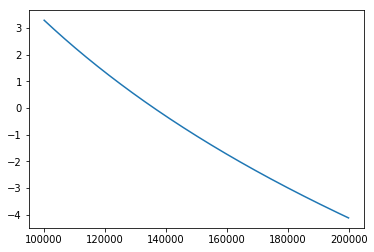

In [34]:
i = np.arange(100000,200000,100)
d = np.array([])

for k in i :
    d =  np.append(d,function(float(k)))
   
plt.plot(i,d)

plt.show()

In [35]:
def newton_solver(guess,TOL):
    x1 = guess+1
    x2 = guess
    i=0
    while abs(x1-x2) > TOL:
        i=i+1
        x1 = x2
        x2 = x1 - (function(x1)/function_der(x1))
        
    return x2,i

In [36]:
pm = newton_solver(100000,0.001)[0]

In [37]:
Um = 0.5*(UR+UL)+0.5*(function_fL(pm)+function_fR(pm))

In [38]:
um=Um

In [39]:
um

-0.02910669551921896

In [40]:
rho_m_L = (pm*rho_L*rhol)/((PL*rhol)-(PL*rho_L*(1-yL))+(pm*rho_L*(1-yL)))
rho_m_R = (pm*rho_R*rhol)/((PR*rhol)-(PR*rho_R*(1-yR))+(pm*rho_R*(1-yR)))
print('rho_m_L:{},rho_m_R:{},p:{},u:{}'.format(rho_m_L,rho_m_R,pm,um))

rho_m_L:878.008182277506,rho_m_R:772.6759070285929,p:135988.5110825304,u:-0.02910669551921896


In [13]:
#SL=(((rho_m_L*um)-(rho_L*UL))/(rho_m_L-rho_L))
#SR=(((rho_m_R*um)-(rho_R*UR))/(rho_m_R-rho_R))
#STL=um-func_c(rho_m_L,yL)
#SHL=UL-func_c(rho_L,yL)
#STR=um+func_c(rho_m_R,yR)
#SHR=UR+func_c(rho_R,yR)

In [319]:
x=-46.420
t=1
#Complete solution in the Left rarefaction wave
u0 = um
u = (UL+um)/2
i=0
while abs(u0-u)>0.00001:
    u0 = u 
    u = UL+a*math.sqrt(yL)*(math.log(((((((rhol*a*math.sqrt(yL))/(u0-(x/t)))-rhol)*(1/(yL-1)))**(-1))-((1-yL)/rhol))*(rho_L/(1-(((1-yL)/rhol)*rho_L)))))
    i=i+1
    
rho=(((((rhol*a*math.sqrt(yL))/(u-(x/t)))-rhol)*(1/(yL-1))))
p = (rho*rhol*(a**2)*yL)/(rhol-(rho*(1-yL)))

In [353]:
x=56.158
t=1
#Complete solution in the Right rarefaction wave
u0 = um
u = (UR+um)/2
i=0
while abs(u0-u)>0.00001:
    u0 = u 
    u = UR-a*math.sqrt(yR)*(math.log(((((((rhol*a*math.sqrt(yR))/(u0-(x/t)))+rhol)*(1/(1-yR)))**(-1))-((1-yR)/rhol))*(rho_R/(1-(((1-yR)/rhol)*rho_R)))))
    i=i+1
    
rho=(((((rhol*a*math.sqrt(yR))/(u-(x/t)))+rhol)*(1/(1-yR))))
p = (rho*rhol*(a**2)*yR)/(rhol-(rho*(1-yR)))

In [41]:
T = np.arange(0,Time,Delta_T)
X = np.arange(-X_interval,X_interval+1,Delta_X)

In [42]:
X

array([-10.  ,  -9.99,  -9.98, ...,  10.97,  10.98,  10.99])

In [43]:
U1_columns = []
for x in X:
    U1_columns.append('U_{}'.format(int(x)))
U2_columns = []
for x in X:
    U2_columns.append('U_{}'.format(int(x)))
U3_columns = []
for x in X:
    U3_columns.append('U_{}'.format(int(x)))
U4_columns = []
for x in X:
    U4_columns.append('U_{}'.format(int(x)))

   
     
U1_database =  pd.DataFrame(columns=U1_columns)
U1_database = pd.concat([U1_database,pd.DataFrame(columns=U1_columns,data=X.reshape(1,np.shape(X)[0]))],axis=0)
U2_database =  pd.DataFrame(columns=U2_columns)
U2_database = pd.concat([U2_database,pd.DataFrame(columns=U2_columns,data=X.reshape(1,np.shape(X)[0]))],axis=0)
U3_database =  pd.DataFrame(columns=U3_columns)
U3_database = pd.concat([U3_database,pd.DataFrame(columns=U3_columns,data=X.reshape(1,np.shape(X)[0]))],axis=0)
U4_database =  pd.DataFrame(columns=U4_columns)
U4_database = pd.concat([U4_database,pd.DataFrame(columns=U4_columns,data=X.reshape(1,np.shape(X)[0]))],axis=0)




#In the case of two shock wave    
if (pm > PL) and (pm > PR):
    
    print('All_shock_wave')
    
    SR=(((rho_m_R*um)-(rho_R*UR))/(rho_m_R-rho_R))
    SL=(((rho_m_L*um)-(rho_L*UL))/(rho_m_L-rho_L))
    
    for t in T:
        
        U1 = np.array([0])   #### rho
        U2 = np.array([0])   #### U
        U3 = np.array([0])   #### P
        U4 = np.array([0])   #### Y
    
        for x in X:
            
            if (x==0) and (t==0):
                U1 = np.append(U1,np.nan)
                U2 = np.append(U2,np.nan)
                U3 = np.append(U3,np.nan)
                U4 = np.append(U4,np.nan)
            
            if ((x)/t)>SR: 
                
                U1 = np.append(U1,rho_R)
                U2 = np.append(U2,UR)
                U3 = np.append(U3,PR)
                U4 = np.append(U4,yR)
                
            if ((x)/t)<SR and ((x)/t)>Um:
                
                U1 = np.append(U1,rho_m_R)
                U2 = np.append(U2,Um)
                U3 = np.append(U3,pm)
                U4 = np.append(U4,yR)
                
            if ((x)/t) < Um and ((x)/t) > SL:
                
                U1 = np.append(U1,rho_m_L)
                U2 = np.append(U2,Um)
                U3 = np.append(U3,pm)
                U4 = np.append(U4,yL)
                
            if ((x)/t) < SL:
                
                U1 = np.append(U1,rho_L)
                U2 = np.append(U2,UL)
                U3 = np.append(U3,PL)
                U4 = np.append(U4,yL)
                
            if ((x)/t)==SR or ((x)/t)==SL or ((x)/t)==Um:
                
                U1 = np.append(U1,np.nan)
                U2 = np.append(U2,np.nan)
                U3 = np.append(U3,np.nan)
                U4 = np.append(U4,np.nan)
                
        U1 = U1[1:]
        U2 = U2[1:]
        U3 = U3[1:]
        U4 = U4[1:]
        U1=U1.reshape(1,np.shape(X)[0])
        U1 = pd.DataFrame(columns=U1_columns,data = U1)
        U1_database=pd.concat([U1_database,U1],axis=0)
        U2=U2.reshape(1,np.shape(X)[0])
        U2 = pd.DataFrame(columns=U2_columns,data = U2)
        U2_database=pd.concat([U2_database,U2],axis=0)
        U3 = U3.reshape(1,np.shape(X)[0])
        U3 = pd.DataFrame(columns=U3_columns,data = U3)
        U3_database=pd.concat([U3_database,U3],axis=0)
        U4 = U4.reshape(1,np.shape(X)[0])
        U4 = pd.DataFrame(columns=U4_columns,data = U4)
        U4_database=pd.concat([U4_database,U4],axis=0)
        
#In the case of two rarefaction wave
if (pm < PL) and (pm < PR):
    
    print('All_Rarefaction_wave')
    
    STL=um-func_c(rho_m_L,yL)
    SHL=UL-func_c(rho_L,yL)
    
    STR=um+func_c(rho_m_R,yR)
    SHR=UR+func_c(rho_R,yR)
    
    for t in T:
        
        U1 = np.array([0])   #### rho
        U2 = np.array([0])   #### U
        U3 = np.array([0])   #### P
        U4 = np.array([0])   #### Y
        for x in X:
            
            if (x==0) and (t==0):
                
                U1 = np.append(U1,np.nan)
                U2 = np.append(U2,np.nan)
                U3 = np.append(U3,np.nan)
                U4 = np.append(U4,np.nan)
                
            if (x/t) > SHR:
                
                U1 = np.append(U1,rho_R)
                U2 = np.append(U2,UR)
                U3 = np.append(U3,PR)
                U4 = np.append(U4,yR)

            
            if ((x/t) > STR) and ((x/t) < SHR):
                
                u0 = um
                u = (UR+um)/2
                i=0
                while abs(u0-u)>0.001:
                    u0 = u 
                    u = UR-a*math.sqrt(yR)*(math.log(((((((rhol*a*math.sqrt(yR))/(u0-(x/t)))+rhol)*(1/(1-yR)))**(-1))-((1-yR)/rhol))*(rho_R/(1-(((1-yR)/rhol)*rho_R)))))
                    i=i+1
    
                rho=(((((rhol*a*math.sqrt(yR))/(u-(x/t)))+rhol)*(1/(1-yR))))
                p = (rho*rhol*(a**2)*yR)/(rhol-(rho*(1-yR)))
                
                U1 = np.append(U1,rho)
                U2 = np.append(U2,u)
                U3 = np.append(U3,p)
                U4 = np.append(U4,yR)
                
            if ((x/t) < STR) and ((x/t) > Um):
                
                U1 = np.append(U1,rho_m_R)
                U2 = np.append(U2,Um)
                U3 = np.append(U3,pm)
                U4 = np.append(U4,yR)
                
            if ((x/t) > STL) and ((x/t) < Um):
                
                U1 = np.append(U1,rho_m_L)
                U2 = np.append(U2,Um)
                U3 = np.append(U3,pm)
                U4 = np.append(U4,yL)
                
            if ((x/t) > SHL) and ((x/t) < STL):
                
                u0 = um
                u = (UL+um)/2
                i=0
                while abs(u0-u)>0.001:
                    u0 = u 
                    u = UL+a*math.sqrt(yL)*(math.log(((((((rhol*a*math.sqrt(yL))/(u0-(x/t)))-rhol)*(1/(yL-1)))**(-1))-((1-yL)/rhol))*(rho_L/(1-(((1-yL)/rhol)*rho_L)))))
                    i=i+1
    
                rho=(((((rhol*a*math.sqrt(yL))/(u-(x/t)))-rhol)*(1/(yL-1))))
                p = (rho*rhol*(a**2)*yL)/(rhol-(rho*(1-yL)))
                
                U1 = np.append(U1,rho)
                U2 = np.append(U2,u)
                U3 = np.append(U3,p)
                U4 = np.append(U4,yL)
                
            if (x/t) < SHL:
                
                U1 = np.append(U1,rho_L)
                U2 = np.append(U2,UL)
                U3 = np.append(U3,PL)
                U4 = np.append(U4,yL)
                
            if ((x/t)==SHR) or ((x/t)==STR) or ((x/t)==Um) or ((x/t)==SHL) or  ((x/t)==STL):
                
                U1 = np.append(U1,np.nan)
                U2 = np.append(U2,np.nan)
                U3 = np.append(U3,np.nan)
                U4 = np.append(U4,np.nan)

                
        U1 = U1[1:]
        U2 = U2[1:]
        U3 = U3[1:]
        U4 = U4[1:]
        U1=U1.reshape(1,np.shape(X)[0])
        U1 = pd.DataFrame(columns=U1_columns,data = U1)
        U1_database=pd.concat([U1_database,U1],axis=0)
        U2=U2.reshape(1,np.shape(X)[0])
        U2 = pd.DataFrame(columns=U2_columns,data = U2)
        U2_database=pd.concat([U2_database,U2],axis=0)
        U3 = U3.reshape(1,np.shape(X)[0])
        U3 = pd.DataFrame(columns=U3_columns,data = U3)
        U3_database=pd.concat([U3_database,U3],axis=0)
        U4 = U4.reshape(1,np.shape(X)[0])
        U4 = pd.DataFrame(columns=U4_columns,data = U4)
        U4_database=pd.concat([U4_database,U4],axis=0)
                
#In the case of shock_rarefaction waves
if (pm > PL) and (pm < PR):
    
    print('Shock_rarefaction_waves')
    
    SL=(((rho_m_L*um)-(rho_L*UL))/(rho_m_L-rho_L))
    
    
    STR=um+func_c(rho_m_R,yR)
    SHR=UR+func_c(rho_R,yR)
    
    for t in T:
        
        U1 = np.array([0])   #### rho
        U2 = np.array([0])   #### U
        U3 = np.array([0])   #### P
        U4 = np.array([0])   #### Y

        
        for x in X:
            
            if (x==0) and (t==0):
                
                U1 = np.append(U1,np.nan)
                U2 = np.append(U2,np.nan)
                U3 = np.append(U3,np.nan)
                U4 = np.append(U4,np.nan)
                
                
            if (x/t) > SHR:
                
                U1 = np.append(U1,rho_R)
                U2 = np.append(U2,UR)
                U3 = np.append(U3,PR)
                U4 = np.append(U4,yR)
            
            if ((x/t) > STR) and ((x/t) < SHR):
                
                u0 = um
                u = (UR+um)/2
                i=0
                while abs(u0-u)>0.00001:
                    u0 = u 
                    u = UR-a*math.sqrt(yR)*(math.log(((((((rhol*a*math.sqrt(yR))/(u0-(x/t)))+rhol)*(1/(1-yR)))**(-1))-((1-yR)/rhol))*(rho_R/(1-(((1-yR)/rhol)*rho_R)))))
                    i=i+1
    
                rho=(((((rhol*a*math.sqrt(yR))/(u-(x/t)))+rhol)*(1/(1-yR))))
                p = (rho*rhol*(a**2)*yR)/(rhol-(rho*(1-yR)))
                
                U1 = np.append(U1,rho)
                U2 = np.append(U2,u)
                U3 = np.append(U3,p)
                U4 = np.append(U4,yR)
                
            if ((x/t) < STR) and ((x/t) > Um):
                
                U1 = np.append(U1,rho_m_R)
                U2 = np.append(U2,Um)
                U3 = np.append(U3,pm)
                U4 = np.append(U4,yR)
                
            if ((x/t) < Um) and ((x/t) > SL):
                
                U1 = np.append(U1,rho_m_L)
                U2 = np.append(U2,Um)
                U3 = np.append(U3,pm)
                U4 = np.append(U4,yL)
                
            if ((x/t) < SL):
                
                U1 = np.append(U1,rho_L)
                U2 = np.append(U2,UL)
                U3 = np.append(U3,PL)
                U4 = np.append(U4,yL)
                
            if ((x/t)==STR) or ((x/t)==SL) or ((x/t)==Um) or ((x/t)==SHR):
                
                U1 = np.append(U1,np.nan)
                U2 = np.append(U2,np.nan)
                U3 = np.append(U3,np.nan)
                U4 = np.append(U4,np.nan)
                
        U1 = U1[1:]
        U2 = U2[1:]
        U3 = U3[1:]
        U4 = U4[1:]
        U1=U1.reshape(1,np.shape(X)[0])
        U1 = pd.DataFrame(columns=U1_columns,data = U1)
        U1_database=pd.concat([U1_database,U1],axis=0)
        U2=U2.reshape(1,np.shape(X)[0])
        U2 = pd.DataFrame(columns=U2_columns,data = U2)
        U2_database=pd.concat([U2_database,U2],axis=0)
        U3 = U3.reshape(1,np.shape(X)[0])
        U3 = pd.DataFrame(columns=U3_columns,data = U3)
        U3_database=pd.concat([U3_database,U3],axis=0)
        U4 = U4.reshape(1,np.shape(X)[0])
        U4 = pd.DataFrame(columns=U4_columns,data = U4)
        U4_database=pd.concat([U4_database,U4],axis=0)


#In the case of rarefaction_shock waves
if (pm < PL) and (pm > PR):
    
    print('rarefaction_shock_waves')
    
    SR=(((rho_m_R*um)-(rho_R*UR))/(rho_m_R-rho_R))
    
    
    
    STL=um-func_c(rho_m_L,yL)
    SHL=UL-func_c(rho_L,yL)
    
    for t in T:
        
        U1 = np.array([0])   #### rho
        U2 = np.array([0])   #### U
        U3 = np.array([0])   #### P
        U4 = np.array([0])   #### Y
        
        for x in X:
            
            if (x==0) and (t==0):
                
                U1 = np.append(U1,np.nan)
                U2 = np.append(U2,np.nan)
                U3 = np.append(U3,np.nan)
                U4 = np.append(U4,np.nan)

            
            if (x/t)>SR: 
                
                U1 = np.append(U1,rho_R)
                U2 = np.append(U2,UR)
                U3 = np.append(U3,PR)
                U4 = np.append(U4,yR)
                
            if ((x/t)<SR) and ((x/t)>Um):
                
                U1 = np.append(U1,rho_m_R)
                U2 = np.append(U2,Um)
                U3 = np.append(U3,pm)
                U4 = np.append(U4,yR)
                
            if ((x/t) > STL) and ((x/t) < Um):
                
                U1 = np.append(U1,rho_m_L)
                U2 = np.append(U2,Um)
                U3 = np.append(U3,pm)
                U4 = np.append(U4,yL)
                
            if ((x/t) > SHL) and ((x/t) < STL):
                
                u0 = um
                u = (UL+um)/2
                i=0
                while abs(u0-u)>0.001:
                    u0 = u 
                    u = UL+a*math.sqrt(yL)*(math.log(((((((rhol*a*math.sqrt(yL))/(u0-(x/t)))-rhol)*(1/(yL-1)))**(-1))-((1-yL)/rhol))*(rho_L/(1-(((1-yL)/rhol)*rho_L)))))
                    i=i+1
    
                rho=(((((rhol*a*math.sqrt(yL))/(u-(x/t)))-rhol)*(1/(yL-1))))
                p = (rho*rhol*(a**2)*yL)/(rhol-(rho*(1-yL)))
                
                U1 = np.append(U1,rho)
                U2 = np.append(U2,u)
                U3 = np.append(U3,p)
                U4 = np.append(U4,yL)
                
            if (x/t) < SHL:
                
                U1 = np.append(U1,rho_L)
                U2 = np.append(U2,UL)
                U3 = np.append(U3,PL)
                U4 = np.append(U4,yL)
                
            if (x/t)==Um or (x/t)==SHL or (x/t)==STL or (x/t)==SR:
                
                U1 = np.append(U1,np.nan)
                U2 = np.append(U2,np.nan)
                U3 = np.append(U3,np.nan)
                U4 = np.append(U4,np.nan)
                
        U1 = U1[1:]
        U2 = U2[1:]
        U3 = U3[1:]
        U4 = U4[1:]
        U1 = U1.reshape(1,np.shape(X)[0])
        U1 = pd.DataFrame(columns=U1_columns,data = U1)
        U1_database=pd.concat([U1_database,U1],axis=0)
        U2 = U2.reshape(1,np.shape(X)[0])
        U2 = pd.DataFrame(columns=U2_columns,data = U2)
        U2_database=pd.concat([U2_database,U2],axis=0)
        U3 = U3.reshape(1,np.shape(X)[0])
        U3 = pd.DataFrame(columns=U3_columns,data = U3)
        U3_database=pd.concat([U3_database,U3],axis=0)
        U4 = U4.reshape(1,np.shape(X)[0])
        U4 = pd.DataFrame(columns=U4_columns,data = U4)
        U4_database=pd.concat([U4_database,U4],axis=0)
                
    
    
    

                
        
    
    
U1_database.set_index(np.append(np.array(['x']),T),inplace=True)
U2_database.set_index(np.append(np.array(['x']),T),inplace=True) 
U3_database.set_index(np.append(np.array(['x']),T),inplace=True)
U4_database.set_index(np.append(np.array(['x']),T),inplace=True)
print('finished')

All_Rarefaction_wave


C:\Users\hamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:129: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\hamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:137: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\hamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:155: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\hamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\hamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:169: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\hamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:187: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\hamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:194: RuntimeWarning: divide by zero encountered in double_scalars


finished


In [44]:
um=Um

In [45]:
um

-0.02910669551921896

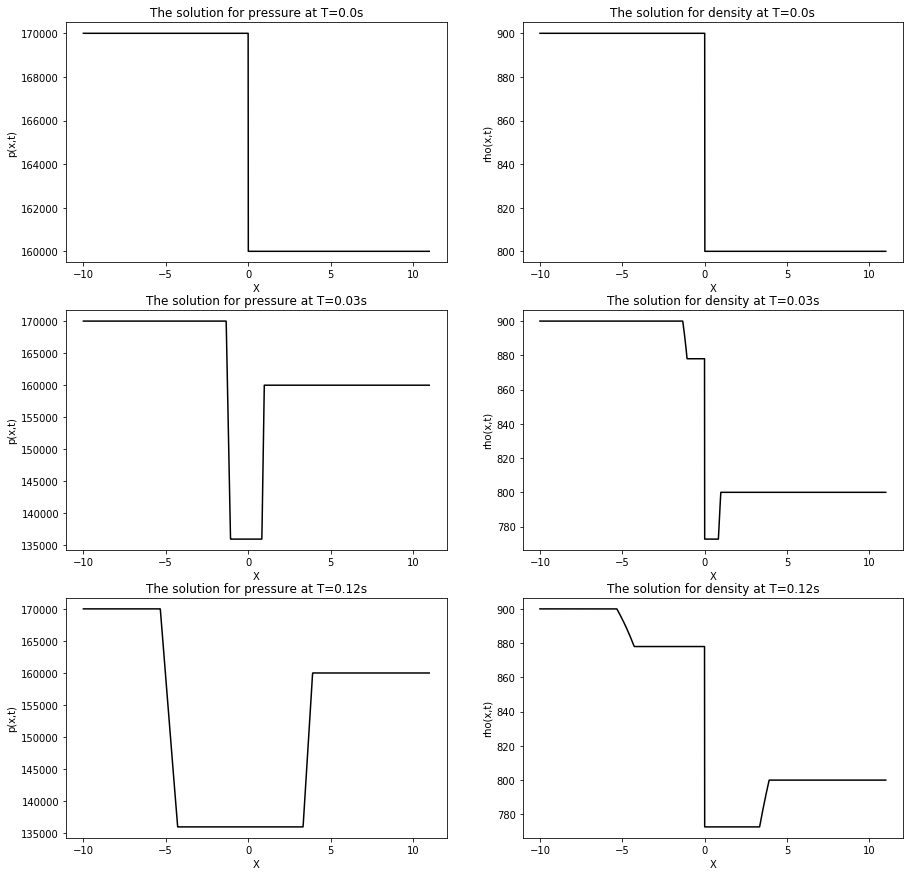

In [46]:
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(15,15),)
axes[0,0].plot(U3_database.iloc[0],U3_database.iloc[1],'black')
axes[1,0].plot(U3_database.iloc[0],U3_database.iloc[4],'black')
axes[2,0].plot(U3_database.iloc[0],U3_database.iloc[13],'black')
axes[0,1].plot(U1_database.iloc[0],U1_database.iloc[1],'black')
axes[1,1].plot(U1_database.iloc[0],U1_database.iloc[4],'black')
axes[2,1].plot(U1_database.iloc[0],U1_database.iloc[13],'black')

axes[0,0].set_title('The solution for pressure at T=0.0s')
axes[0,0].set_xlabel('X')
axes[0,0].set_ylabel('p(x,t)')

axes[1,0].set_title('The solution for pressure at T=0.03s')
axes[1,0].set_xlabel('X')
axes[1,0].set_ylabel('p(x,t)')

axes[2,0].set_title('The solution for pressure at T=0.12s')
axes[2,0].set_xlabel('X')
axes[2,0].set_ylabel('p(x,t)')


axes[0,1].set_title('The solution for density at T=0.0s')
axes[0,1].set_xlabel('X')
axes[0,1].set_ylabel('rho(x,t)')

axes[1,1].set_title('The solution for density at T=0.03s')
axes[1,1].set_xlabel('X')
axes[1,1].set_ylabel('rho(x,t)')

axes[2,1].set_title('The solution for density at T=0.12s')
axes[2,1].set_xlabel('X')
axes[2,1].set_ylabel('rho(x,t)')


plt.savefig('r1.png',facecolor='w',edgecolor='black')

plt.show()

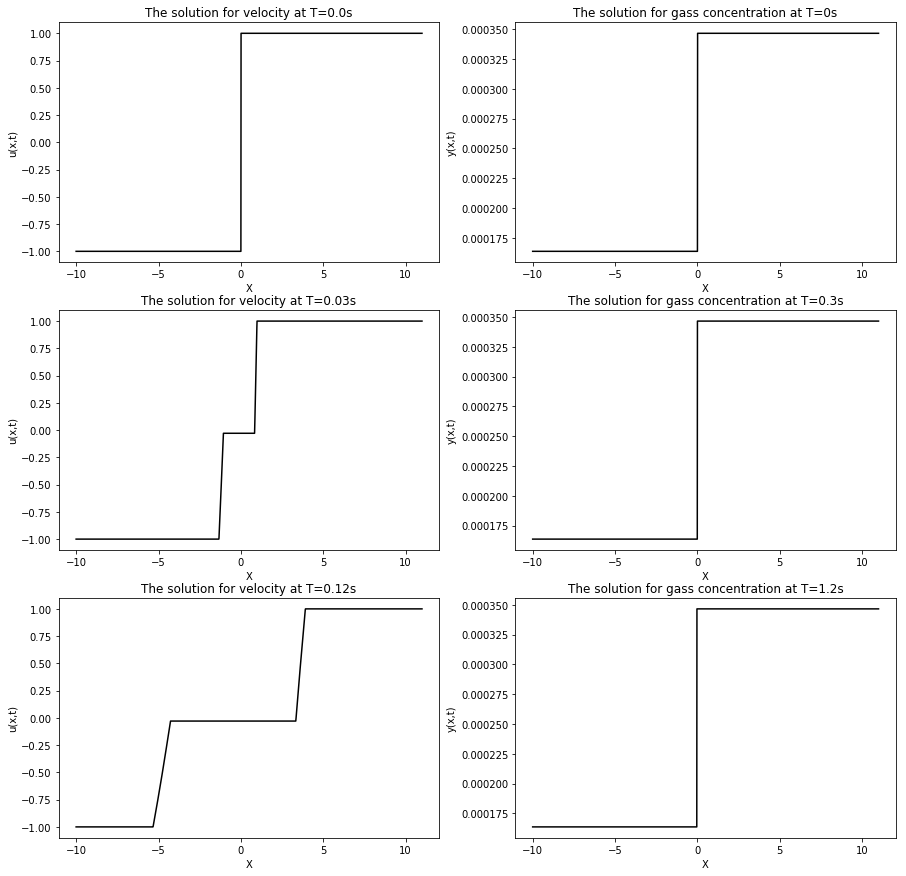

In [47]:
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(15,15),)

axes[0,0].plot(U2_database.iloc[0],U2_database.iloc[1],'black')
axes[1,0].plot(U2_database.iloc[0],U2_database.iloc[4],'black')
axes[2,0].plot(U2_database.iloc[0],U2_database.iloc[13],'black')
axes[0,1].plot(U4_database.iloc[0],U4_database.iloc[1],'black')
axes[1,1].plot(U4_database.iloc[0],U4_database.iloc[31],'black')
axes[2,1].plot(U4_database.iloc[0],U4_database.iloc[121],'black')




axes[0,0].set_title('The solution for velocity at T=0.0s')
axes[0,0].set_xlabel('X')
axes[0,0].set_ylabel('u(x,t)')

axes[1,0].set_title('The solution for velocity at T=0.03s')
axes[1,0].set_xlabel('X')
axes[1,0].set_ylabel('u(x,t)')

axes[2,0].set_title('The solution for velocity at T=0.12s')
axes[2,0].set_xlabel('X')
axes[2,0].set_ylabel('u(x,t)')

axes[0,1].set_title('The solution for gass concentration at T=0s')
axes[0,1].set_xlabel('X')
axes[0,1].set_ylabel('y(x,t)')

axes[1,1].set_title('The solution for gass concentration at T=0.3s')
axes[1,1].set_xlabel('X')
axes[1,1].set_ylabel('y(x,t)')

axes[2,1].set_title('The solution for gass concentration at T=1.2s')
axes[2,1].set_xlabel('X')
axes[2,1].set_ylabel('y(x,t)')

plt.savefig('r2.png',facecolor='w',edgecolor='black')

plt.show()


In [48]:
um

-0.02910669551921896

In [23]:
SR

55.428058790183506